In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt   
import pandas as pd

In [3]:

sns.set_theme(style="whitegrid")

titanic = pd.read_csv('titanic.csv')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic_no_outliers = titanic[
    (titanic['age'].between(titanic['age'].quantile(0.05), titanic['age'].quantile(0.95))) &
    (titanic['fare'].between(titanic['fare'].quantile(0.05), titanic['fare'].quantile(0.95)))
]

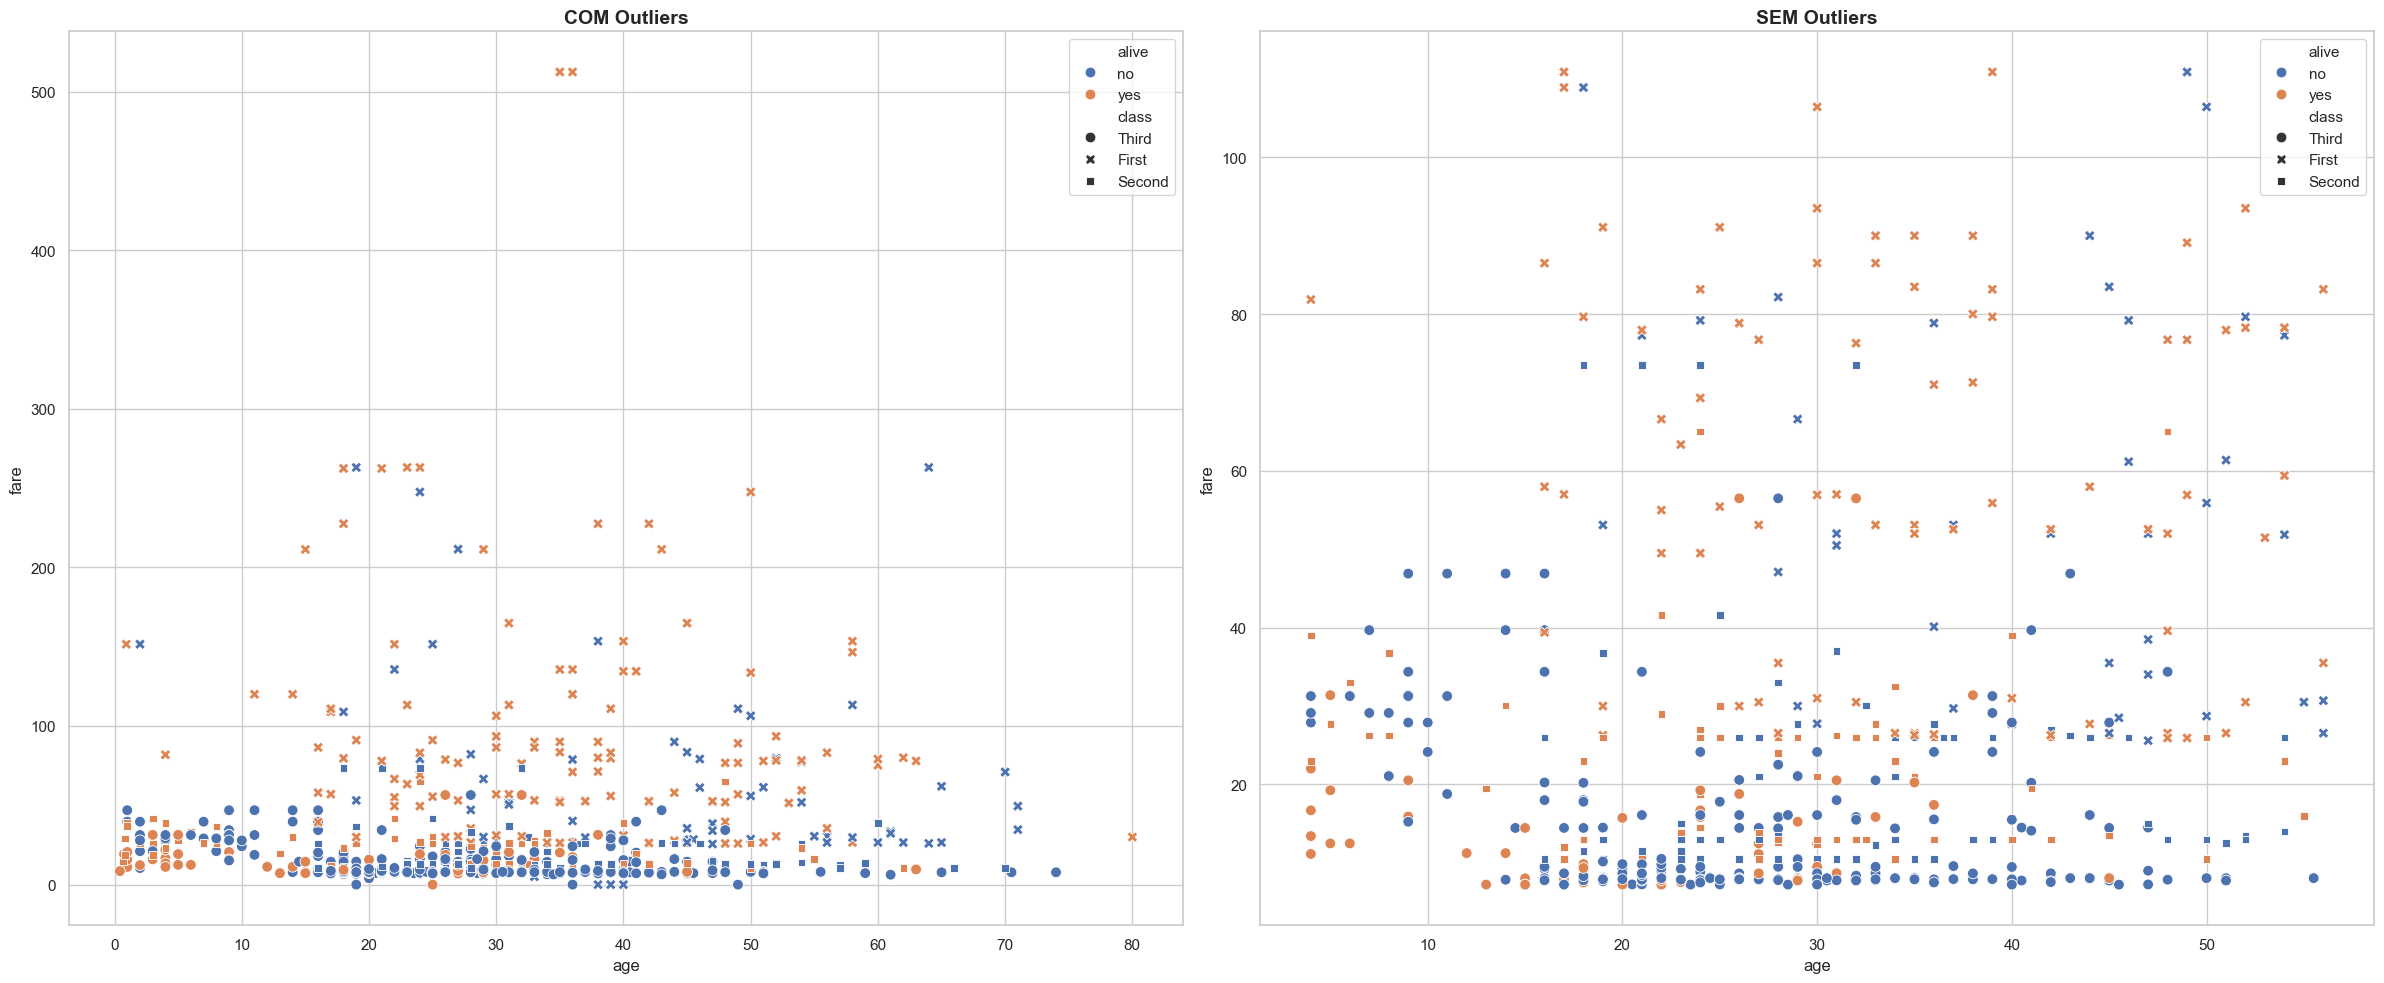

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

sns.scatterplot(data=titanic, x='age', y='fare', hue='alive', style='class', s=60, ax=axes[0])
axes[0].set_title('COM Outliers', fontsize=14, fontweight='bold')

sns.scatterplot(data=titanic_no_outliers, x='age', y='fare', hue='alive', style='class', s=60, ax=axes[1])
axes[1].set_title('SEM Outliers', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#remover os outliers do scatterplot